In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import math

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Inferencia

#https://en.wikipedia.org/wiki/Inference

La inferencia estadística se divide en tras grandes partes,
dependiendo de la naturaleza del problema que queremos resolver:

* Estimación puntual. 
* Estimación por intervalos de confianza. 
* Contraste de hipótesis paramétrica.


## Estimacion puntual

Objetivo de la estimación puntual: en función del modelo que estemos aceptando y en función de una muestra concreta $(x_1,x_2, \cdot \cdot \cdot, x_n)$, cual es el valor $\theta \in
\Theta $ que nos parece más plausible.

### Construcción de estimadores por el método de los momentos. 

Sea $X$ una población con función de masa
$P_\theta$, o de densidad $f_\theta$, $\theta=(\theta_1, \theta_2,
\cdot \cdot \cdot , \theta_k) \in \Theta$, y $(X_1, X_2, \cdot
\cdot \cdot, X_n)$ una muestra aleatoria simple. 

El estimador de $\theta$ por el método de los momentos es el formado por los
valores $(\widetilde{\theta}_1, \widetilde{\theta}_2, \cdot \cdot
\cdot , \widetilde{\theta}_k) $ que se obtiene al resolver en
$\theta_1, \theta_2, \cdot \cdot \cdot, \theta_k$ el sistema
$$ \left\{ \begin{array}{llll} E_\theta[X]=\frac{1}{n}\sum_{i=1}^n
X_i \\ E_\theta[X^2]=\frac{1}{n}\sum_{i=1}^n X_i^2 \\ \cdot \cdot
\cdot \cdot \cdot \\ E_\theta[X^k]=\frac{1}{n}\sum_{i=1}^n X_i^k
\end{array} \right. $$


#### Ejercicio
Una población $X$ sigue una exponencial
$Exp(\lambda)$ de parámetro desconocido. Calcular el estimador
de $\theta=\lambda$ por el método de los momentos.

$X$ es continua con función de densidad 
$$f_\lambda(x)=\left\{
\begin{array}{ll} 0 \hspace{1cm} \\ \lambda e^{- \lambda x}
\hspace{0.5cm} \end{array} \right. $$

In [2]:
from sympy import *
init_printing()

In [10]:
l = Symbol('lambda',positive=True,nonzero=True)
x = Symbol('x')

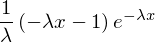

In [11]:
#La esperanza de f es igual a la integral de xf(x) en su conjunto
E_formula=integrate(x*l*exp(-l*x),x)
E_formula

In [14]:
E=limit(E_formula,x,oo)-limit(E_formula,x,0)
E

#### Ejercicio

Sea $(X_1,X_2, \cdot \cdot
\cdot,X_n)$ una muestra aleatoria de $$f_\theta (x)=\left\{
\begin{array}{ll} 0 \hspace{1.5cm} x\leq 0 \\ e^{-x+\theta}
\hspace{0.5cm} x > 0 \end{array} \right. \hspace{1cm} \theta
\in \Theta = \mathbb{R}.$$

* Hallar el estimador por el método de los momentos de $\theta$. 
* Estudiar si el estimador encontrado en el apartadoanterior es insesgado para estimar el parámetro $\theta$.



In [16]:
t = Symbol('theta')
x = Symbol('x')

In [17]:
#La esperanza de f es igual a la integral de xf(x) en su conjunto
E_formula=integrate(x*exp(-x+t),x)
E_formula

In [18]:
E=limit(E_formula,x,oo)-limit(E_formula,x,0)
E

### Construcción de estimadores por el método de máxima verosimilitud.

 Sea $X$ una población con función de masa
$P_\theta$, o de densidad $f_\theta$, $\theta=(\theta_1, \theta_2,
\cdot \cdot \cdot , \theta_k) \in \Theta$, y $(X_1, X_2, \cdot
\cdot \cdot, X_n)$ una muestra aleatoria simple. El estimador de
máxima verosimilitud de $\theta$ es el formado por los valores
$(\widehat{\theta}_1,\widehat{\theta}_2, \cdot \cdot \cdot
,\widehat{\theta}_k)$ que maximiza lo que llamamos función de
verosimilitud de la muestra $(x_1,x_2, \cdot \cdot \cdot ,x_n)$
obtenida

$$L(\theta)=L(\theta;x_1,x_2, \cdot \cdot \cdot, x_n)=\left\{
\begin{array}{ll} P_\theta (x_1) \cdot P_\theta (x_2) \cdot \cdot
\cdot P_\theta (x_n) \hspace{0.7cm} \textrm{discreta} \\ f_\theta
(x_1) \cdot f_\theta (x_2) \cdot \cdot \cdot f_\theta (x_n)
\hspace{0.7cm} \textrm{continua} \end{array} \right. $$


#### Ejercicio 

Un una gran piscifactoría hay una proporción desconocida de  peces de una especia A.
  Para obtener información sobre esa proporción, vamos a ir sacando peces al azar.

* Si la proporción de peces de la especie A es $p$, ¿cuál es la probabilidad de que el primer pez de la especie A sea el décimo que extraemos? 
* Tres personas realizan, independientemente unas de otras, el proceso de sacar peces al azar hasta encontrarse con el primero del tipo A:

    * La primera persona obtiene el primer pez tipo A en la décima exacción. 
    * La segunda persona obtiene el primer pez tipo A en la decimoquinta extracción. 
    * La tercera persona obtiene el primer pez tipo A en la decimoctava extracción.

Escribir la función de verosimilitud y obtener la estimación de máxima verosimilitud de $p$.


In [23]:
from sympy import *
init_printing()

In [24]:
p = Symbol('p')

In [25]:
P = (1-p)**9 * p  * (1-p)**14 * p * (1-p)**17 * p
P

In [28]:
#El maximo se encuentra en el valor de p que maximiza P y por tanto anula la derivada de P.
diff(P,p)

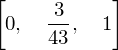

In [29]:
solve(diff(P,p),p)

#### Ejercicio

La duración en minutos de un determinado viaje
es una variable aleatoria con distribución normal de media
desconocida y desviación típica igual a $3$. En una muestra
aleatoria de diez realizaciones del viaje en cuestión se
obtuvieron los siguientes tiempos
$$x_1=10,1 \;\; x_2=6,5 \;\; x_3=5,5 \;\; x_4=7,9 \;\; x_5=8,2
\;\; x_6=6,5$$ $$  x_7=7,0\;\; x_8=8,1 \;\; x_9=6,9 \;\
x_{10}=7,7.$$ Se pide:

* Estimar por máxima verosimilitud la duración media del viaje.  
* Calcular la probabilidad de que, en valor absoluto, la diferencia entre la estimación media estimada y la real sea menor que un minuto.


In [33]:
from scipy import stats

In [34]:
data = [10.1,6.5,5.5,7.9,8.2,6.5,10.1,6.5,5.5,7.9,8.2,6.5,7.0,8.1,6.9,7.7]

In [35]:
#stats.norm.fit haya los parametros que maximicen la funcion de verosimilitud
values = stats.norm.fit([10.1,6.5,5.5,7.9,8.2,6.5,10.1,6.5,5.5,7.9,8.2,6.5,7.0,8.1,6.9,7.7])
values

In [36]:
minorm=stats.norm(values)

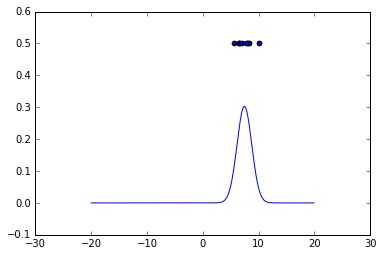

In [37]:
x=np.arange(-20,20,0.1)
plt.plot(x,map(stats.norm(7.4437499999999996, 1.3176535726434317).pdf,x))
plt.scatter(data,np.full(len(data),.5))
plt.show()

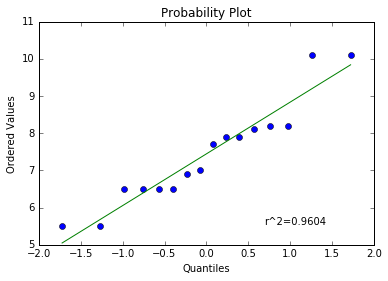

In [38]:
stats.probplot(data, plot=plt)
plt.show()

#### Ejercicio

El parámetro de una distribución de Poisson
puede tomar uno de los cuatro valores siguientes: $\lambda = 4;\;
4,5;\; 5,5;\; 6$. Decida cual de ellos puede ser, considerando una
muestra aleatoria simple de tamaño dos $(X_1,X_2)$, con
realización $(x_1,x_2)=(3,7)$, y basándose en el principio de
máxima verosimilitud.


In [19]:
def getLikelyhood(l):
    mipoisson = stats.poisson(l)
    return mipoisson.pmf(3)*mipoisson.pmf(7)

In [22]:
for i in [4,4.5,5.5,6]:
    print getLikelyhood(i)

0.0116322109959
0.0138961026573
0.013989616433
0.0122856159239


In [ ]:
# Elejimos 5.5

#### Ejercicio

Vamos a clasificar a las personas de un país según dos características: color de los ojos (claros u oscuros) y sexo (hombre o mujer). Las dos características son independientes.

* Obtenemos una muestra al azar de la población con los
siguientes resultados

    * 200 mujeres con ojos claros. 
    * 150 hombres con ojosclaros. 
    * 350 mujeres con ojos oscuros. 
    * 300 hombres con ojos oscuros.

* Obtener la estimación de máxima verosimilitud de

    * p= probabilidad de ser hombre. 
    * q= probabilidad de tener ojos claros.

*  Después de muchas horas de intenso trabajo llegamos a
saber con exactitud que p=0,4 y q=0,6. Si tomamos 8 personas al
azar de ese país, ¿cuál es la probabilidad de encontrar alguna
mujer de ojos oscuros? Y si la muestra que tomamos es de 200
personas, ¿cuál es la probabilidad de que haya más de 60
mujeres de ojos oscuros?

In [24]:
from sympy import *
init_printing()

In [6]:
p = Symbol('p')
q = Symbol('q')

In [7]:
P = (1-p)**200 * q**200  * p**150 * q**150 * (1-p)**350 * (1-q)**350 * p**300 * (1-q)**300
P

In [28]:
diff(P,q)

In [31]:
lp = 450*log(p)+350*log(q)+550*log(1-p)+650*log(1-q)
lp

In [34]:
ps=solve(diff(lp,p),p)
ps

In [37]:
qs=solve(diff(lp,q),q)
qs

In [17]:
a = Symbol("a")
b = Symbol("b")

In [25]:
print log(a**b)
print "="
print b*log(a)

log(a**b)
=
b*log(a)


In [26]:
print log(a*b)
print "="
print log(b)+log(a)

log(a*b)
=
log(a) + log(b)



#### Ejercicio
El error (en centigramos) que se comete al pesar un objeto en una balanza puede considerarse como una variable aleatoria $X$ con distribución $N(0;15)$.

* Probabilidad de que el error cometido (en valor absoluto) en
una pesada sea inferior a 20 centigramos. 
* Número mínimo de pesadas para que el error medio cometido (en valor absoluto) sea inferior a 5 centigramos con una probabilidad de 0,9.


